In [1]:
import warnings
warnings.filterwarnings("ignore")
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
import scipy.sparse as sp

In [2]:
adata = sc.read_h5ad('MOB_3D.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 131828 × 15176
    obs: 'xcoord', 'ycoord', 'section'
    var: 'n_cells'
    obsm: 'coord', 'spatial'

In [3]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=5000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [4]:
adata_new = GAT_adata(
    adata,
    data_type='Slide-seq',
    experiment='3d_model',
    coord_sf=6000,
    sec_name='section',
    select_section=[1, 3, 5, 6, 8],
    gap=0.05,
    train_epoch=200,
    seed=1234, 
    batch_size=512,
    learning_rate=1e-3,
    w_recon=0.1,
    w_w=0.1,
    w_l1=0.1,
    relu=True,
    device='cpu'
)

Epochs: 100%|██████████| 200/200 [2:27:09<00:00, 44.15s/it, latent_loss: 0.01033, recon_loss: 0.14629, total_loss: 0.00250]  


In [5]:
adata_new

AnnData object with n_obs × n_vars = 131828 × 5000
    obs: 'xcoord', 'ycoord', 'section'
    obsm: 'coord'

In [25]:
# Select highly variable gene
show_gene=["Ptgds"]

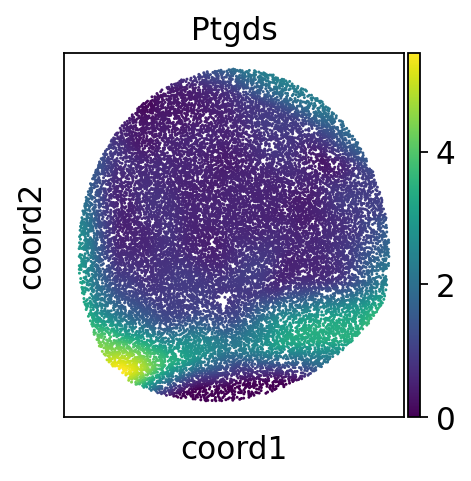

In [26]:
# recovery result
sc.set_figure_params(dpi=80, figsize=(3, 3))
sc.pl.embedding(adata_stage[adata_stage.obs['section']==4], basis="coord", color=show_gene)

## 3D visualization

In [22]:
N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(0.9, 0.24705882, N)
vals[:, 1] = np.linspace(0.9, 0, N)
vals[:, 2] = np.linspace(0.9, 0.49019608, N)
newcmp = ListedColormap(vals)

In [23]:
plot_gene="Ptgds"

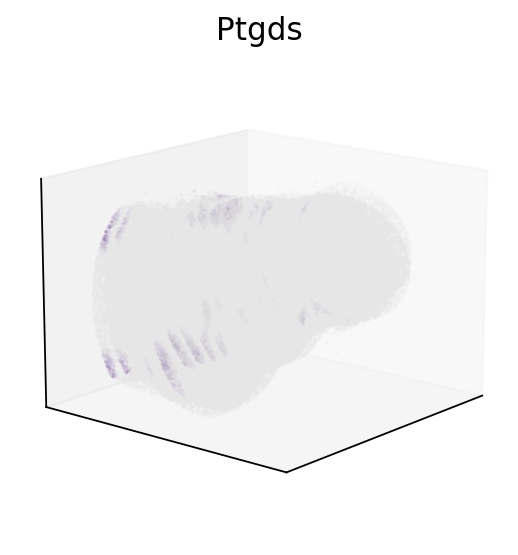

In [24]:
plot_expr=np.array(sp.coo_matrix(adata_new[:,plot_gene].X).todense())

fig = plt.figure(figsize=(4, 4))
ax1 = plt.axes(projection='3d')

ax1.scatter3D(adata_new.obsm["coord"][:,2], adata_new.obsm["coord"][:,1], -adata_new.obsm["coord"][:,0], 
              c=1*(plot_expr/max(plot_expr))**1, \
              alpha=1*(plot_expr/max(plot_expr))**1, \
              cmap=newcmp,
              s=0.05*((plot_expr/max(plot_expr))**1*0.9+0.1), \
              vmin=0.1*max(plot_expr))

ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_zlabel('')

ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_zticklabels([])

ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])

ax1.set_ylim(2101.1-828.815/1, 4998.1+828.815/1)
ax1.set_zlim(-5691.2, -1136.57)

plt.title(plot_gene)

ax1.elev = 15
ax1.azim = 40